### Import Packages

In [3]:
from __future__ import absolute_import, division, print_function
%load_ext autoreload
%autoreload 2

import numpy as np
from time import gmtime, strftime
import random


# TensorFlow and tf.keras
import tensorflow as tf

import aging as age

tf.test.gpu_device_name()

# Define directory with matlab files
# direc = 'D:/MLdata/18-01-09d-Exp/Extract Data/'
# direc  = 'D:/Nicholas_ML/18-01-09d-Exp/Extract Data/'
direc = 'D:/MLdata/'
# Define directory to save model and plots
savedir = 'D:/MLdata/Model/' + strftime("%Y-%m-%d %H-%M", gmtime()) + '/'

random.seed(135)
np.random.seed(135)

Using TensorFlow backend.


### Import Data

In [21]:
# Optimized Data Extractor
crop_size = 750
split_size = crop_size // 2
clip_value = 25
image_grid_size = int(crop_size**2 / split_size**2)

file_num = 4

folders, files = age.file_names(direc = 'D:/MLdata/', 
                                num_samples = 2, 
                                num_exps = file_num)

length_index, split_images, label_dic = age.data_extractor(files, 
                     folders, 
                     direc = 'D:/MLdata/', 
                     crop_size = crop_size, 
                     split_size = split_size,
                     clip_value = clip_value,
                     subtract = False, 
                     log_image = True)


### Troubleshooting

-------------------------------------- ML_block1_Exp328.mat --------------------------------------
########## Fs = 0.01, Fn = 89.97, T = 3.77 ##########


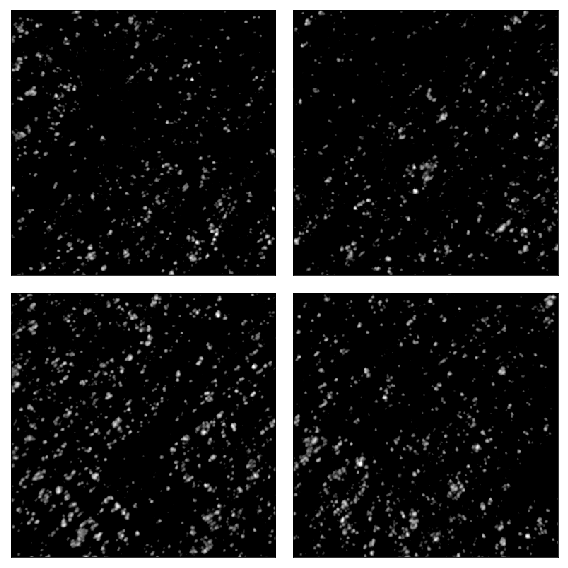

########## Fs = 0.01, Fn = 89.97, T = 4.23 ##########


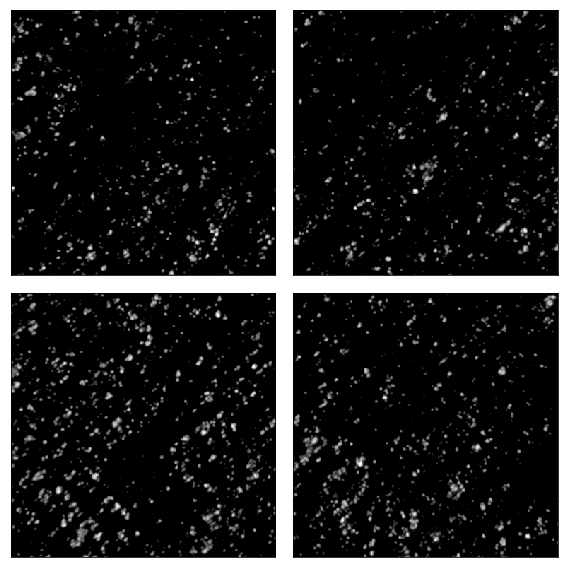

########## Fs = 0.01, Fn = 90.0, T = 4.76 ##########


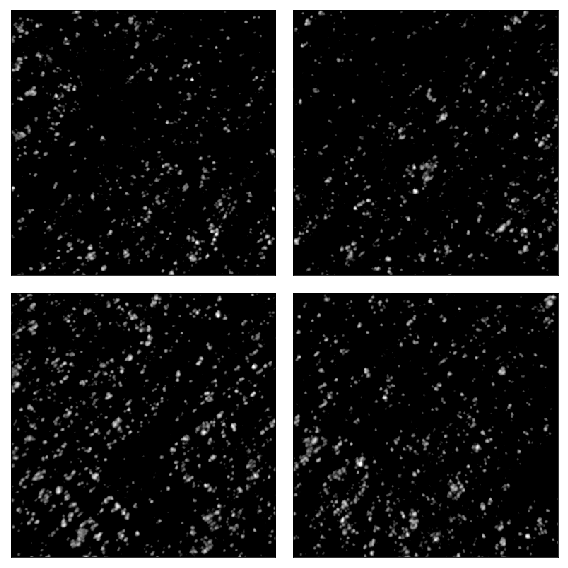

########## Fs = 0.01, Fn = 89.96, T = 5.35 ##########


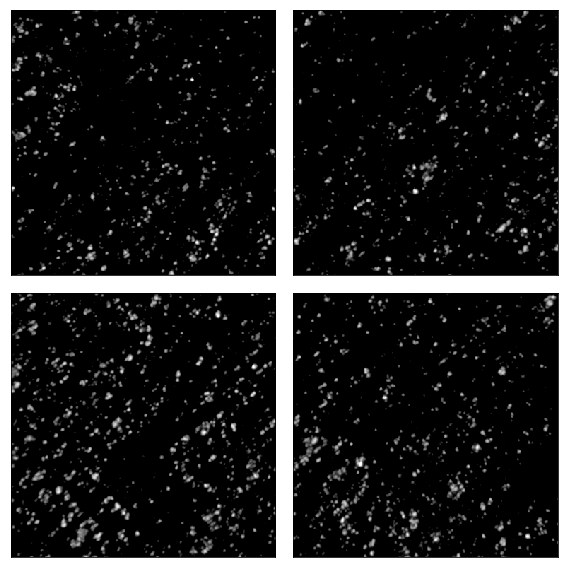

########## Fs = 0.01, Fn = 89.99, T = 6.02 ##########


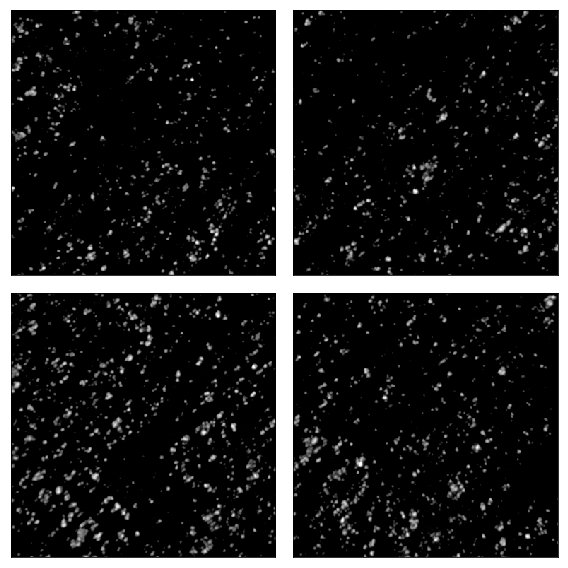

########## Fs = 0.01, Fn = 89.97, T = 6.76 ##########


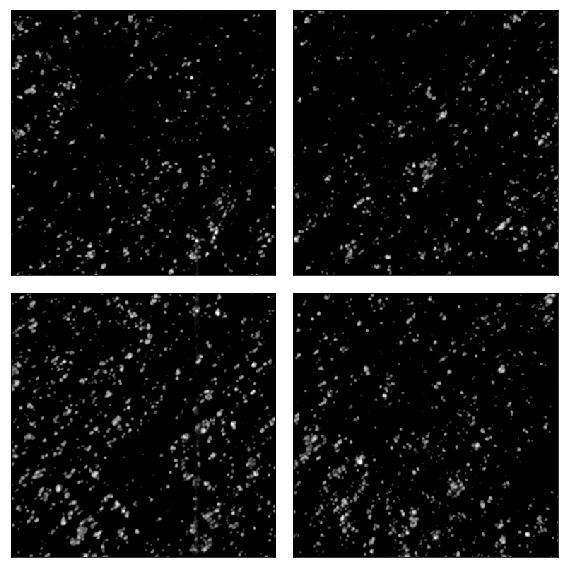

########## Fs = 0.01, Fn = 89.99, T = 7.6 ##########


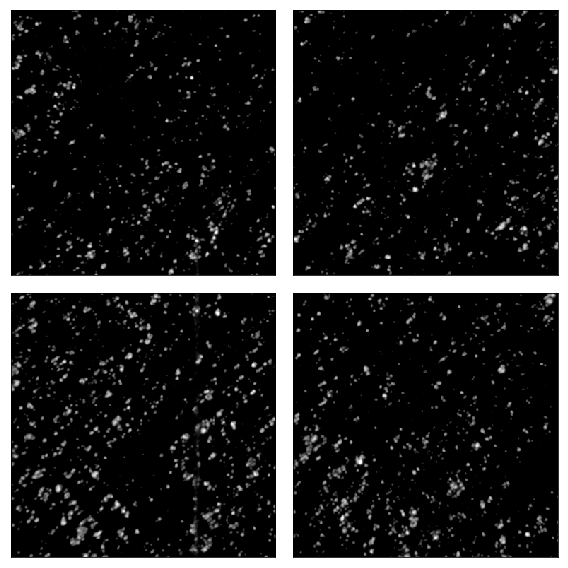

########## Fs = 0.0, Fn = 89.97, T = 8.56 ##########


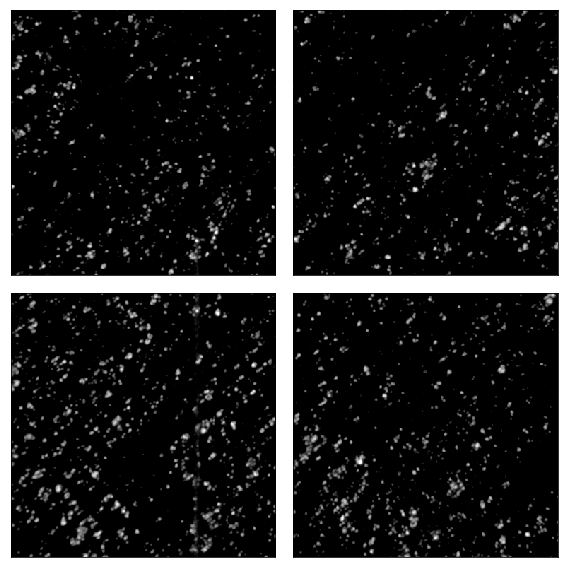

########## Fs = 0.0, Fn = 89.98, T = 9.62 ##########


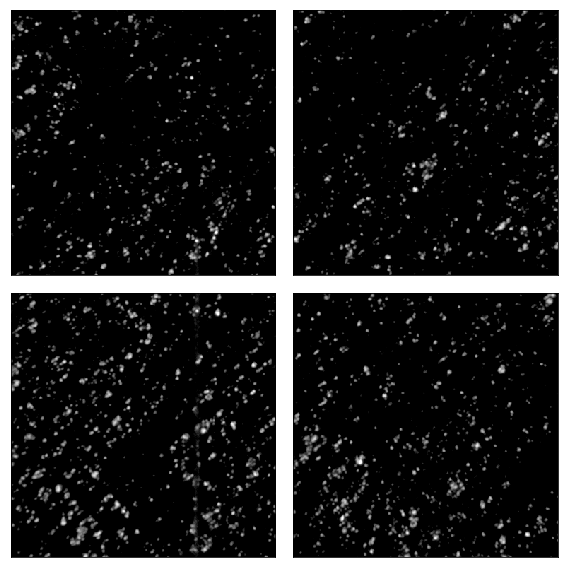

########## Fs = 0.0, Fn = 89.99, T = 10.82 ##########


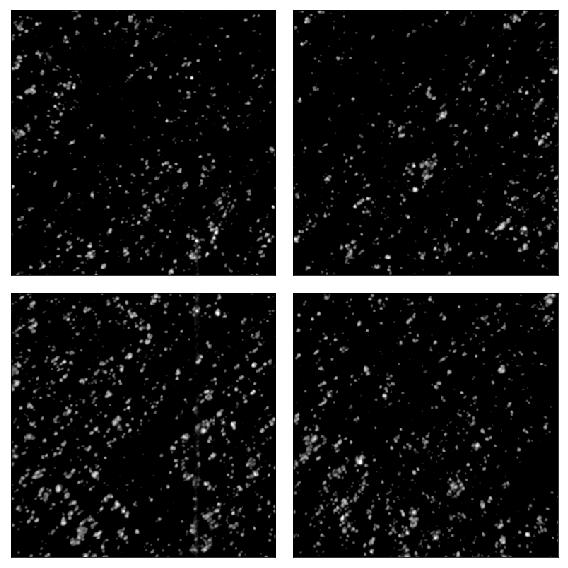

########## Fs = 0.0, Fn = 90.0, T = 12.14 ##########


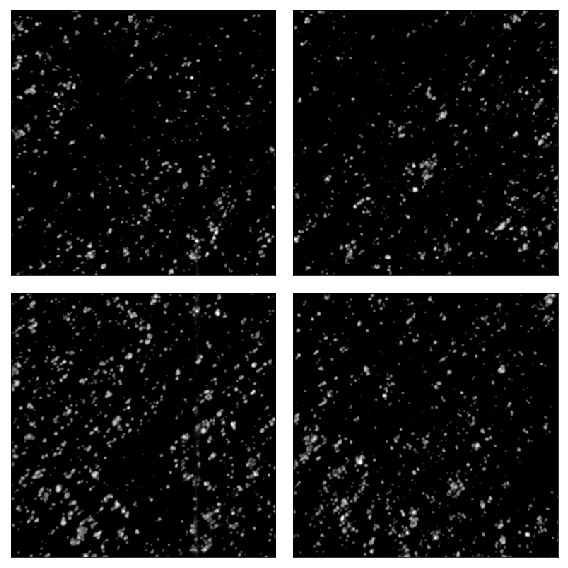

########## Fs = 0.0, Fn = 89.99, T = 13.63 ##########


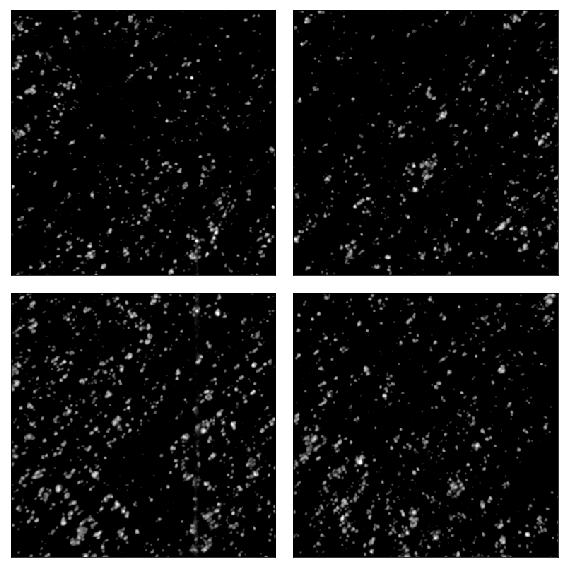

########## Fs = 0.0, Fn = 89.99, T = 15.32 ##########


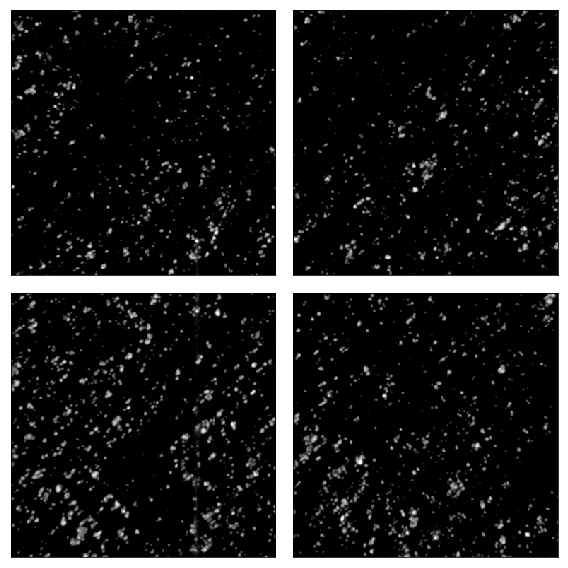

########## Fs = 0.0, Fn = 90.0, T = 17.2 ##########


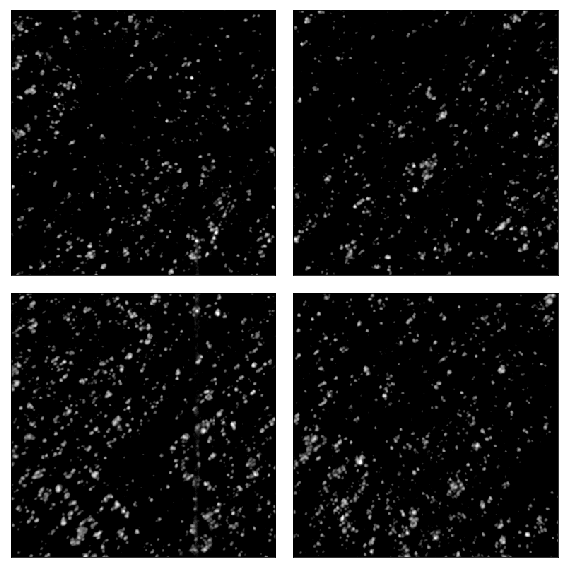

########## Fs = 0.0, Fn = 89.98, T = 19.32 ##########


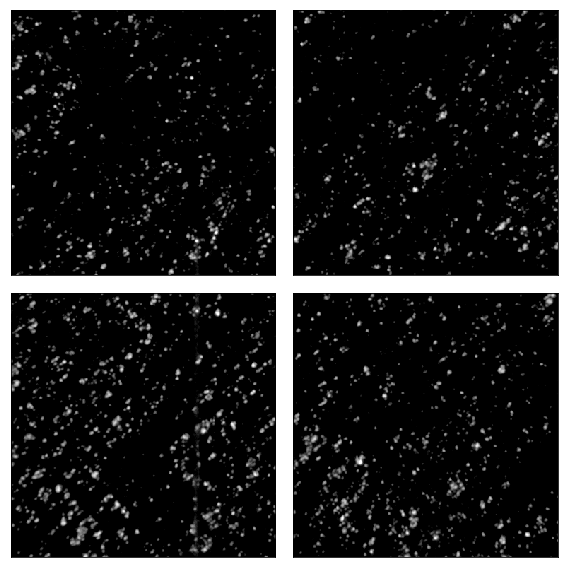

########## Fs = 0.0, Fn = 89.99, T = 21.71 ##########


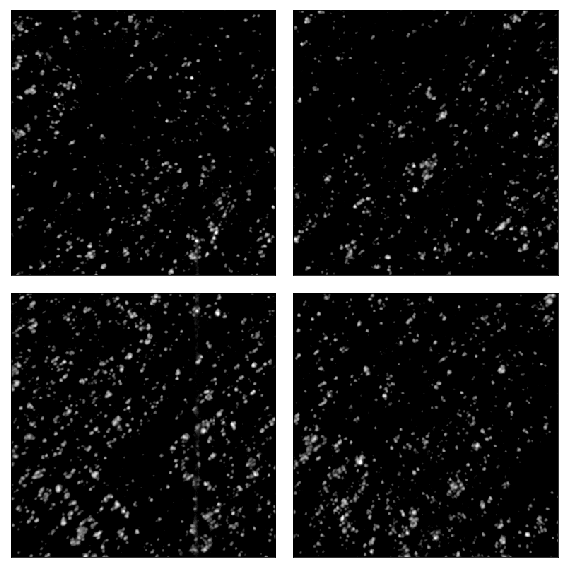

########## Fs = 0.0, Fn = 89.98, T = 24.38 ##########


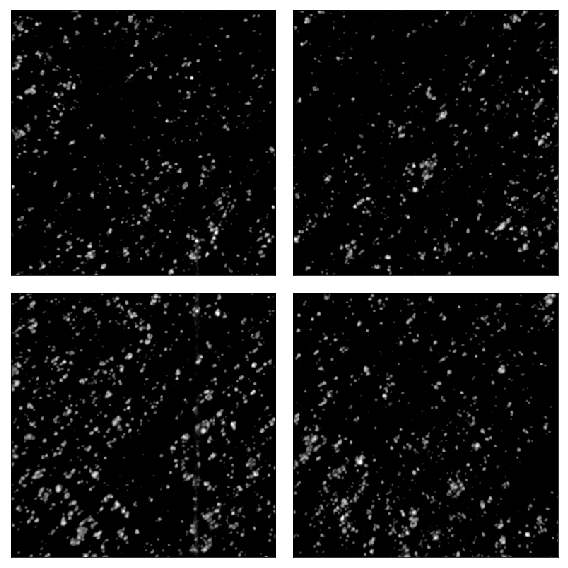

-------------------------------------- ML_block1_Exp311.mat --------------------------------------
########## Fs = 0.01, Fn = 89.99, T = 6.02 ##########


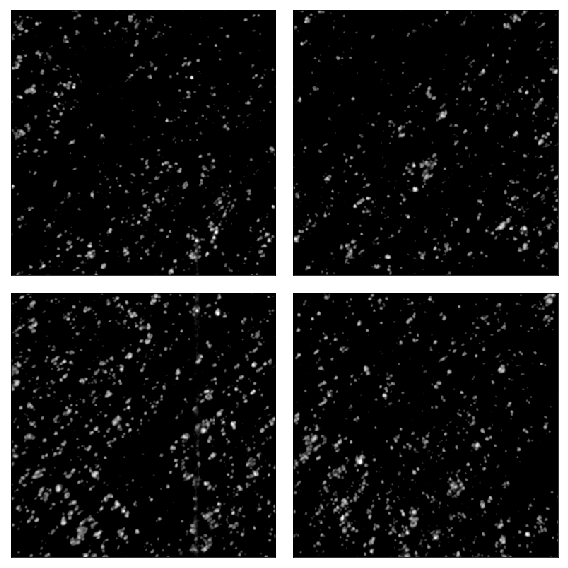

########## Fs = 0.01, Fn = 89.97, T = 6.76 ##########


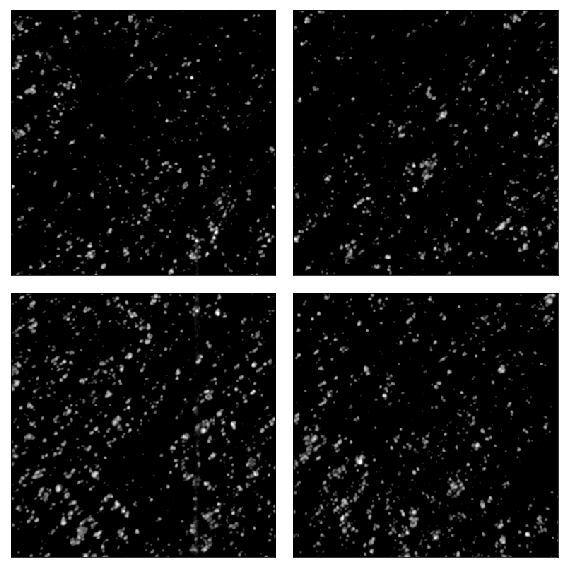

########## Fs = 0.01, Fn = 89.99, T = 7.6 ##########


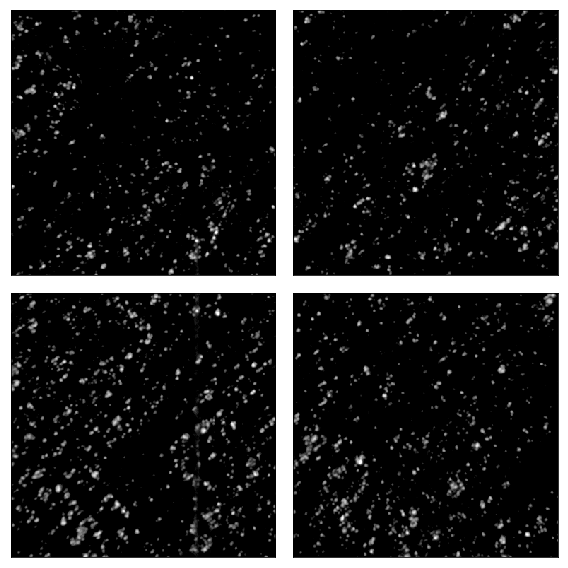

########## Fs = 0.0, Fn = 89.97, T = 8.56 ##########


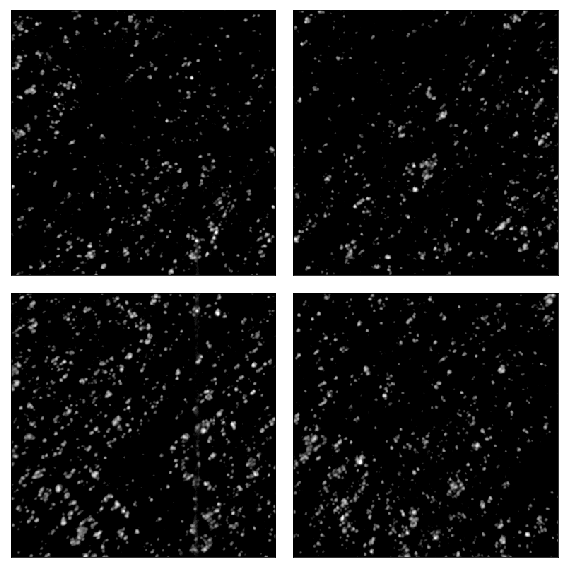

########## Fs = 0.0, Fn = 89.98, T = 9.62 ##########


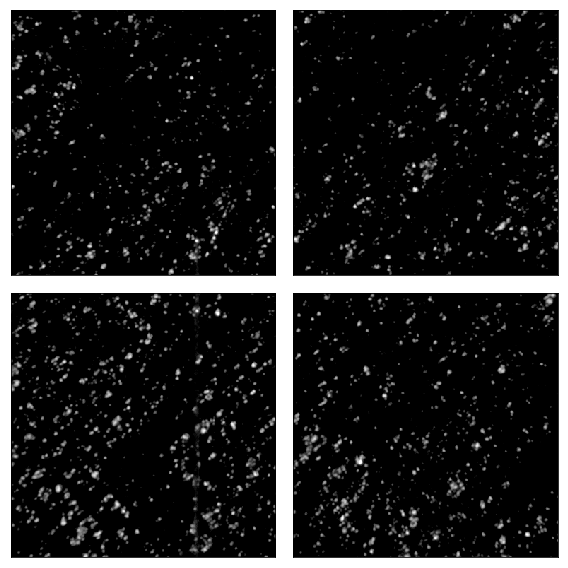

########## Fs = 0.0, Fn = 89.99, T = 10.82 ##########


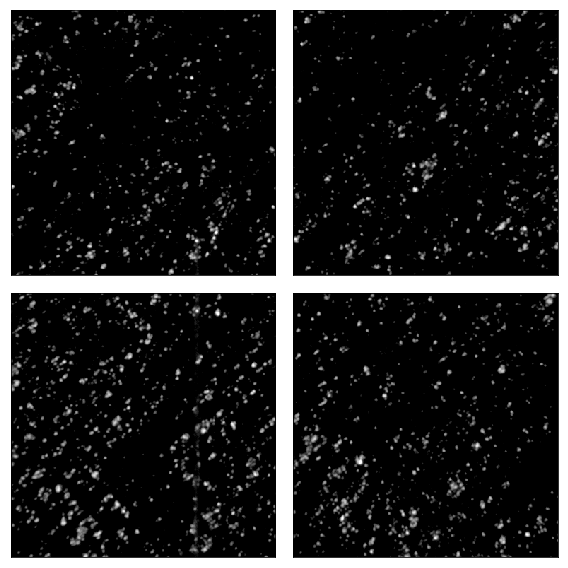

########## Fs = 0.0, Fn = 90.0, T = 12.14 ##########


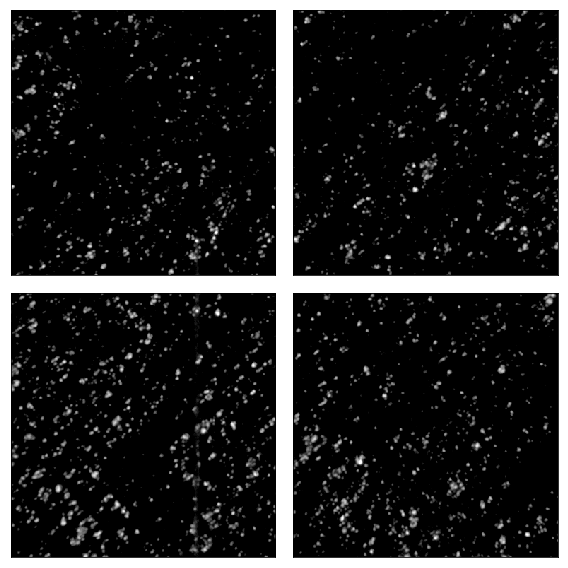

########## Fs = 0.0, Fn = 89.99, T = 13.63 ##########


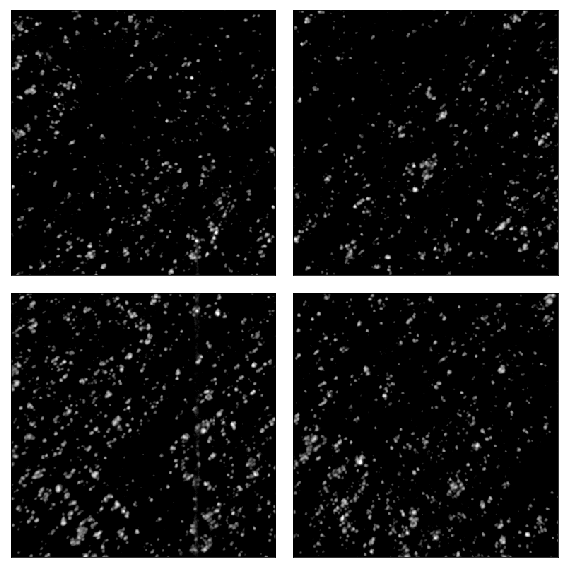

########## Fs = 0.0, Fn = 89.99, T = 15.32 ##########


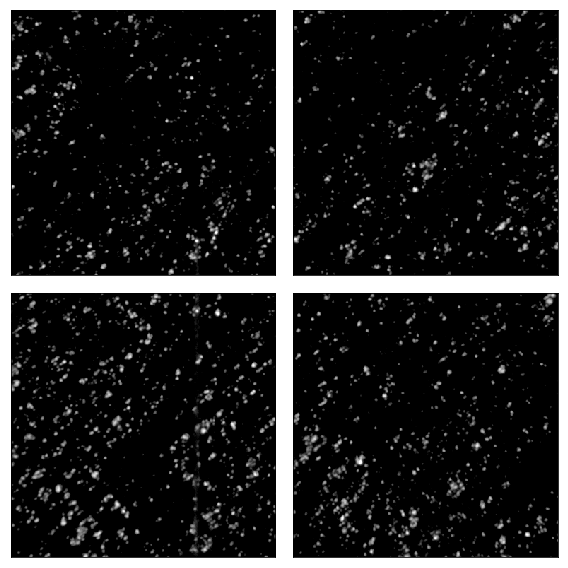

########## Fs = 0.0, Fn = 90.0, T = 17.2 ##########


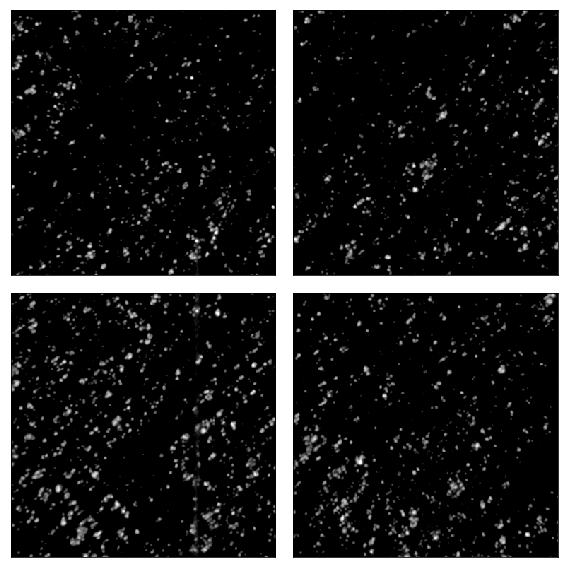

########## Fs = 0.0, Fn = 89.98, T = 19.32 ##########


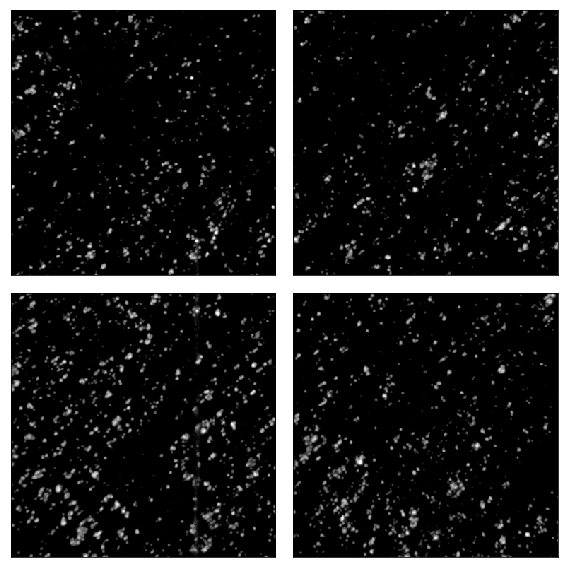

########## Fs = 0.0, Fn = 89.99, T = 21.71 ##########


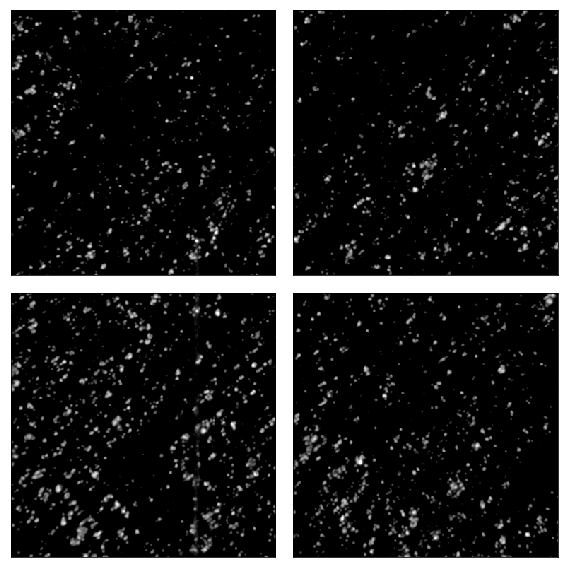

########## Fs = 0.0, Fn = 89.98, T = 24.38 ##########


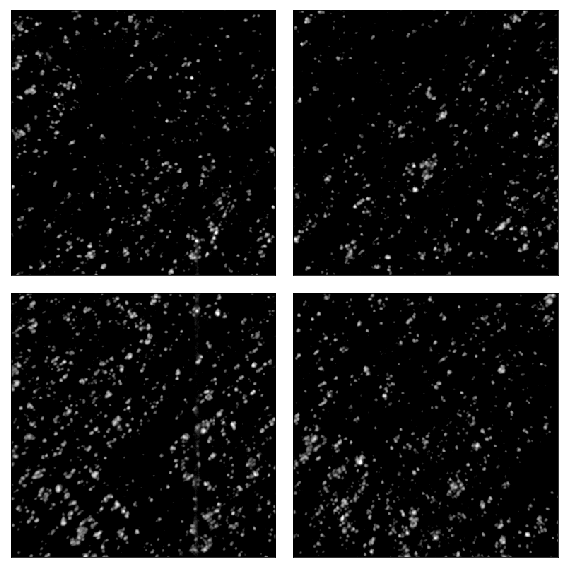

########## Fs = 10.01, Fn = 89.99, T = 3.21 ##########


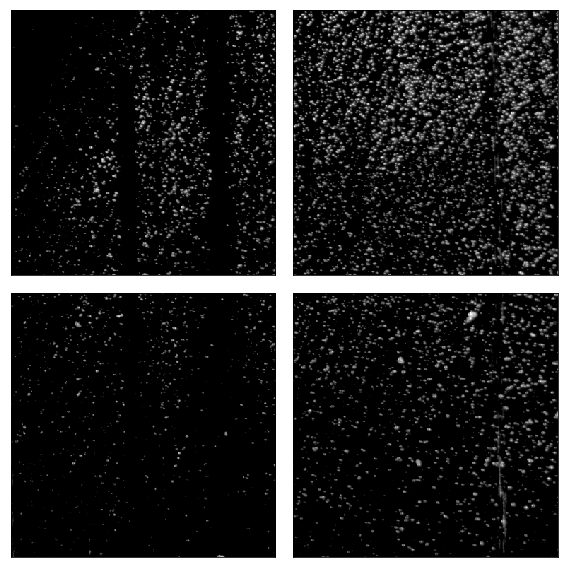

########## Fs = 9.77, Fn = 89.98, T = 8.28 ##########


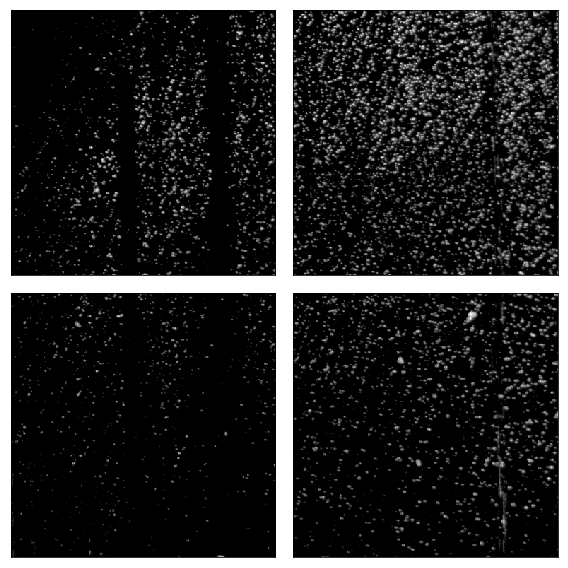

########## Fs = 9.82, Fn = 89.96, T = 9.3 ##########


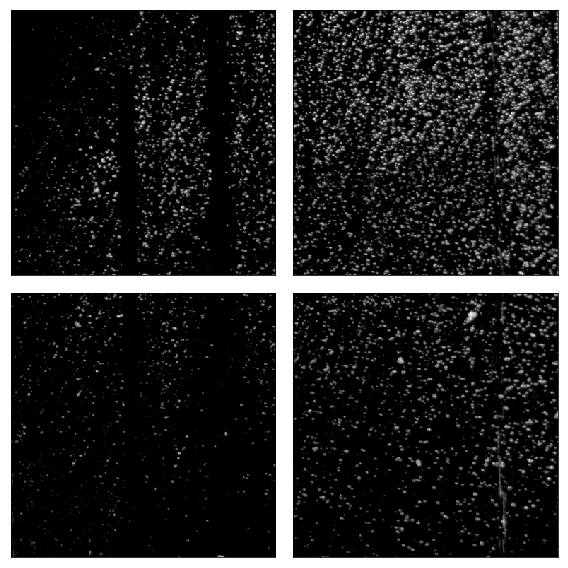

########## Fs = 9.86, Fn = 89.96, T = 10.43 ##########


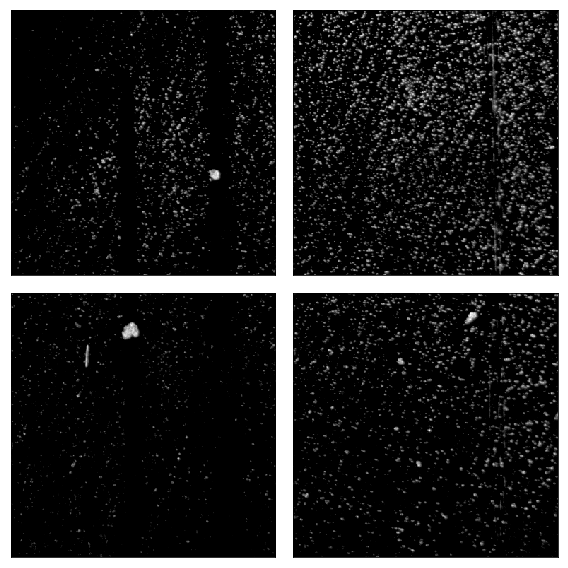

########## Fs = 9.9, Fn = 89.97, T = 11.73 ##########


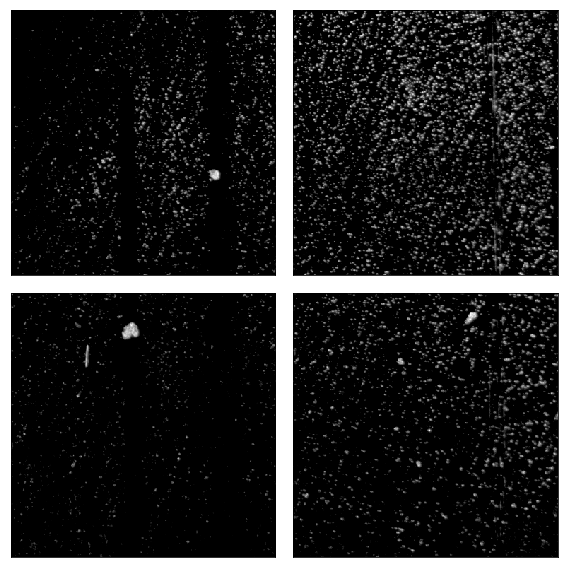

########## Fs = 9.93, Fn = 89.96, T = 13.17 ##########


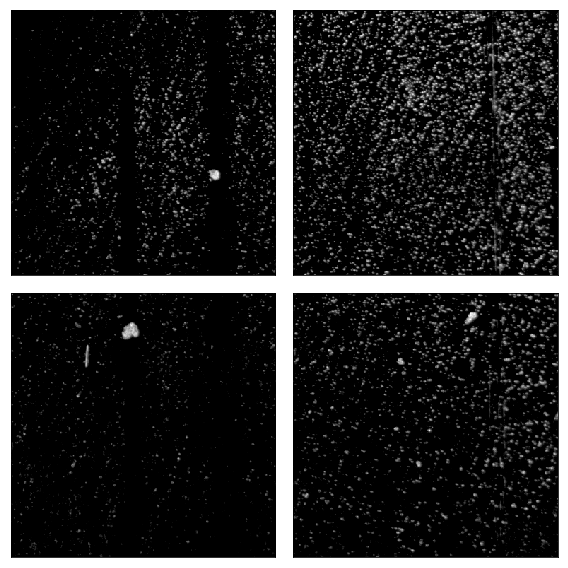

########## Fs = 9.96, Fn = 89.97, T = 14.78 ##########


IndexError: index 372 is out of bounds for axis 0 with size 360

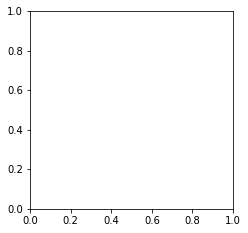

In [22]:
age.time_plotter(length_index, files, label_dic, split_images, crop_size, split_size, full = True)
# age.difference(Fs_label, Fn_label, T_label, split_images, length_index, files, image_grid_size)

### Assemble Data

In [ ]:
train_data, train_labels, test_data, test_labels = \
        age.assemble_1_block(
            split_images = split_images, 
            label_dic = {'T':label_dic['T']},
            block_label = label_dic['Block'],
            image_grid_size = image_grid_size, 
            log_time = True)

# train_data, train_labels, test_data, test_labels = \
# age.younger(train_data, train_labels, test_data, test_labels, time_cut = 5)

# split_images = []
# T_label = []
# Fs_label = []
# Fn_label = []
# block_label = []

min_val = np.min([np.min(train_data), np.min(test_data)])

#Final Renormilization
train_data = (train_data - min_val)/(1 - min_val)
test_data = (test_data - min_val)/(1 - min_val)

### Build CNN

In [ ]:
image_size = train_data.shape[1]
    
# Create the base model
# https://keras.io/applications/#inceptionv3
base_model = tf.keras.applications.inception_v3.InceptionV3(
                include_top=False, 
                weights='imagenet', 
                input_shape=(image_size,image_size,3))

base_model.trainable = False
    
incep_model = tf.keras.Sequential([
    base_model,
#     tf.keras.layers.Conv2D(16, (2, 2)),
#     tf.keras.layers.LeakyReLU(alpha=0.5),
#     tf.keras.layers.Dropout(rate = 0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32),
    tf.keras.layers.LeakyReLU(alpha=0.5),
    tf.keras.layers.Dropout(rate = 0.3),
    tf.keras.layers.Dense(1),
    tf.keras.layers.LeakyReLU(alpha=0.5)
    ])

#custom_model = tf.keras.Sequential([
#        tf.keras.layers.Conv2D(8, kernel_size=(2, 2),
#                       input_shape=(image_size, image_size, 1)),
#        tf.keras.layers.LeakyReLU(alpha=0.5),
#        tf.keras.layers.Dropout(rate = 0.3),
#        tf.keras.layers.Conv2D(16, (3, 3)),
#        tf.keras.layers.LeakyReLU(alpha=0.5),
#        tf.keras.layers.Dropout(rate = 0.3),
#        tf.keras.layers.Flatten(),
#        tf.keras.layers.Dense(32),
#        tf.keras.layers.LeakyReLU(alpha=0.5),
#        tf.keras.layers.Dropout(rate = 0.3),
#        tf.keras.layers.Dense(1),
#        tf.keras.layers.LeakyReLU(alpha=0.5)

### Train CNN

In [ ]:
model, history = age.inception_train(
                    train_data, 
                    train_labels, 
                    test_data, 
                    test_labels,
                    savedir, 
                    incep_model,
                    epochs = 20)

# model, history = age.aion(train_data, train_labels, test_data, test_labels,
#                     savedir, full_model)

In [ ]:
test_predic = model.predict(np.tile(
    test_data.reshape(test_data.shape[0], 
    test_data.shape[1], 
    test_data.shape[2], 
    1), 
        3))
train_predic = model.predict(np.tile(train_data.reshape(
    train_data.shape[0], 
    train_data.shape[1],  
    train_data.shape[2], 
    1),
        3))

### Examine Results

In [ ]:
age.hist_plotter(history, savedir + "Incep_history")

In [ ]:
train_times = train_labels.flatten()
train_pred_times = train_predic.flatten()

# train_shear = train_labels[:,1]
# train_pred_shear = train_predic[:,1]

test_times = test_labels.flatten()
test_pred_times = test_predic.flatten()

# test_shear = test_labels[:,1]
# test_pred_shear = test_predic[:,1]

age.data_plotter(train_times, train_pred_times, savedir + "Incep_Age_train" , 'b')

age.data_plotter(test_times, test_pred_times, savedir + "Incep_Age_test" , 'k')